# The following kernel contains algorithms for KSI data exploration and analysis. 
# Machine Learning algorithms have been applied to predict the fatality of accidents

In [1]:
%matplotlib inline
#pip install folium
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
from scipy.stats import norm # for scientific Computing
from scipy import stats, integrate
import matplotlib.pyplot as plt

#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import pandas as pd

# Data Preparation

##  Data cleaning by replacing blank value to NA

In [2]:
# Any results you write to the current directory are saved as output.
%time KSI_CLEAN=pd.read_csv('/kaggle/input/killed-or-seriously-injured-ksi-toronto-clean/KSI_CLEAN.csv')

CPU times: user 181 ms, sys: 27.8 ms, total: 209 ms
Wall time: 214 ms


In [3]:
#missing values
KSI_CLEAN = KSI_CLEAN.replace(' ', np.nan, regex=False)
#printing percentage of missing values for each feature
print(KSI_CLEAN.isna().sum()/len(KSI_CLEAN)*100)

ACCNUM            0.000000
YEAR              0.000000
MONTH             0.000000
DAY               0.000000
HOUR              0.000000
MINUTES           0.000000
WEEKDAY           0.000000
LATITUDE          0.000000
LONGITUDE         0.000000
Ward_Name         0.000000
Ward_ID           0.000000
Hood_Name         0.000000
Hood_ID           0.000000
Division          0.000000
District          0.007964
STREET1           0.000000
STREET2           8.473361
OFFSET           88.428765
ROAD_CLASS        0.000000
LOCCOORD          0.676913
ACCLOC           37.508959
TRAFFCTL          0.191128
VISIBILITY        0.015927
LIGHT             0.015927
RDSFCOND          0.055746
ACCLASS           0.000000
IMPACTYPE         0.000000
INVTYPE           0.031855
INVAGE            0.000000
INJURY           11.722545
FATAL_NO          0.000000
INITDIR          30.166441
VEHTYPE          13.594011
MANOEUVER        43.346341
DRIVACT          50.617186
DRIVCOND         50.641077
PEDTYPE          83.937246
P

### The following heatmap shows the features having maximum missing values

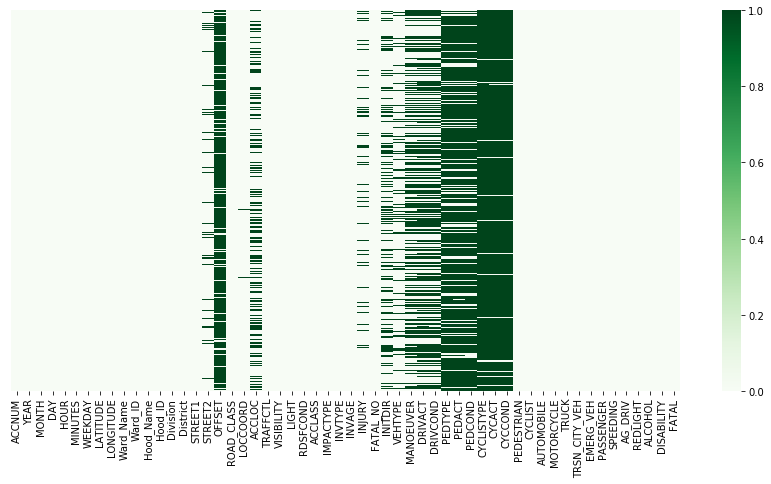

In [4]:
fig, ax = plt.subplots(figsize=(15,7))
#heatmap to visualize features with most missing values
sns.heatmap(KSI_CLEAN.isnull(), yticklabels=False,cmap='Greens')

Lets try to understand that what causes of accidents resulted in Fatal incidents (involving 1 or more deaths).
To do the first lets get the unique values of fatal incidents in a seperate df and then do the analysis. 

In [5]:
KSI_CLEAN.shape

(12557, 56)

##  Data cleaning by dropping columns with large amount of missing value from heat map

In [6]:
## Dropping columns where missing values were greater than 80%
KSI_CLEAN = KSI_CLEAN.drop(["PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE", "CYCACT", "CYCCOND", "OFFSET"], axis=1)
KSI_CLEAN.shape

(12557, 49)

## Changing the property damage and non-fatal columns to Non-Fatal

In [7]:

KSI_CLEAN['ACCLASS'] = np.where(KSI_CLEAN['ACCLASS'] == 'Property Damage Only', 'Non-Fatal', KSI_CLEAN['ACCLASS'])
KSI_CLEAN['ACCLASS'] = np.where(KSI_CLEAN['ACCLASS'] == 'Non-Fatal Injury', 'Non-Fatal', KSI_CLEAN['ACCLASS'])
KSI_CLEAN.ACCLASS.unique()

array(['Non-Fatal', 'Fatal'], dtype=object)

In [8]:
# Verifying columns with object data type
print(KSI_CLEAN.select_dtypes(["object"]).columns)

Index(['Ward_Name', 'Hood_Name', 'Division', 'District', 'STREET1', 'STREET2',
       'ROAD_CLASS', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND'],
      dtype='object')


## Data cleaning by changing data type

In [9]:
##changing all object data types to category 
objdtype_cols = KSI_CLEAN.select_dtypes(["object"]).columns
KSI_CLEAN[objdtype_cols] = KSI_CLEAN[objdtype_cols].astype('category')

In [10]:
KSI_CLEAN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 49 columns):
ACCNUM           12557 non-null int64
YEAR             12557 non-null int64
MONTH            12557 non-null int64
DAY              12557 non-null int64
HOUR             12557 non-null int64
MINUTES          12557 non-null int64
WEEKDAY          12557 non-null int64
LATITUDE         12557 non-null float64
LONGITUDE        12557 non-null float64
Ward_Name        12557 non-null category
Ward_ID          12557 non-null int64
Hood_Name        12557 non-null category
Hood_ID          12557 non-null int64
Division         12557 non-null category
District         12556 non-null category
STREET1          12557 non-null category
STREET2          11493 non-null category
ROAD_CLASS       12557 non-null category
LOCCOORD         12472 non-null category
ACCLOC           7847 non-null category
TRAFFCTL         12533 non-null category
VISIBILITY       12555 non-null category
LIGHT            12

# Data relationship exploration

## Accident numbers against month and year

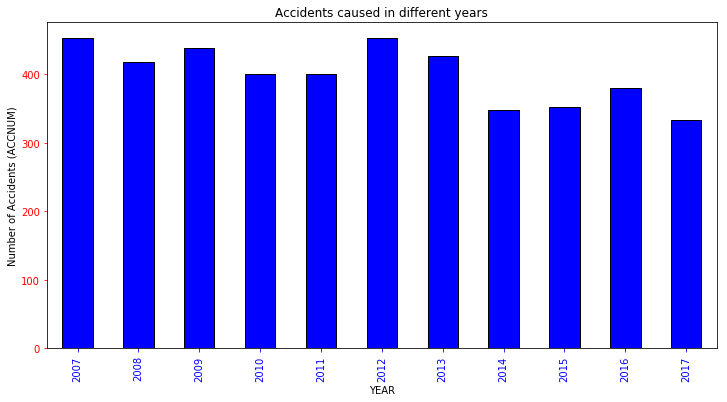

In [11]:
#Number of Unique accidents by Year
Num_accident = KSI_CLEAN.groupby('YEAR')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents caused in different years")
plt.ylabel('Number of Accidents (ACCNUM)')

ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
#Num_accident.plot(kind='bar',color= my_colors)
plt.show()
  

## Total number of incidnets have reduced slightly over the years.

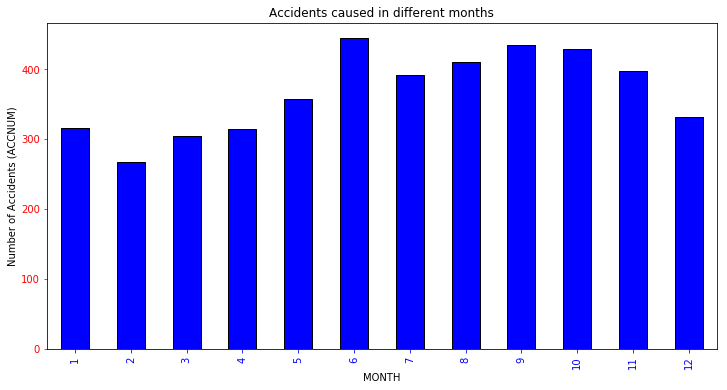

In [12]:
#Number of Unique accidents by Year
Num_accident = KSI_CLEAN.groupby('MONTH')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents caused in different months")
plt.ylabel('Number of Accidents (ACCNUM)')



ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
#Num_accident.plot(kind='bar',color= my_colors)
plt.show()

## From the data above, accidents happened more from June to October

#### 2.2 Heat map of accidents

In [13]:
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn import tree, metrics
from scipy.stats import norm 
from scipy import stats, integrate
import matplotlib.pyplot as plt
from IPython.display import HTML
import folium
from folium.plugins import HeatMap
from math import sqrt

## Creating a Heatmap of where Fatality happened (Injury == Fatal)

In [14]:

KSI_Fatal = KSI_CLEAN[KSI_CLEAN['INJURY'] == 'Fatal']
KSI_Fatal = KSI_Fatal[['LATITUDE', 'LONGITUDE', 'FATAL']]
lat_Toronto = KSI_CLEAN.describe().at['mean','LATITUDE']
lng_Toronto = KSI_CLEAN.describe().at['mean','LONGITUDE']
#Fatal_map = folium.Map(location = [lat_Toronto, lng_Toronto], zoom_start=5)
Toronto_location = [lat_Toronto, lng_Toronto]
#Toronto_location = [43.6532, -79.3832]

Fatal_map = folium.Map(Toronto_location, zoom_start=10.255)
HeatMap(KSI_Fatal.values, min_opacity =0.3).add_to(Fatal_map)
Fatal_map

# ACCLASS VS Fatal VS injury --- looking for target column (FATAL)

ACCLASS is columns that classified into 3 catergory while fatal only show whether is fatal. 

1.In general column ACCLASS and FATAL both show same pattern. 

2.Injury miss a lot of information thus not very meaningful to be the target column

As Fatal column was already in int type and quite similar to ACCLASS, it will be used as output in data modeling later.

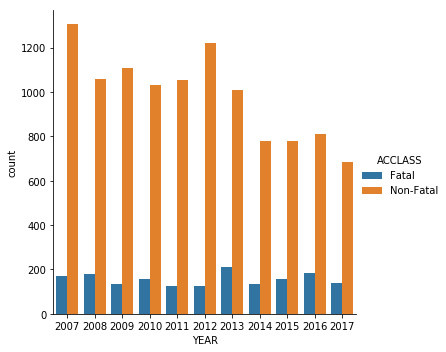

In [15]:
#Categorizing Fatal vs. non-Fatal Incident (non-unique i.e: one accident is counted depending upon involved parties)

sns.catplot(x='YEAR', kind='count', data=KSI_CLEAN,  hue='ACCLASS')

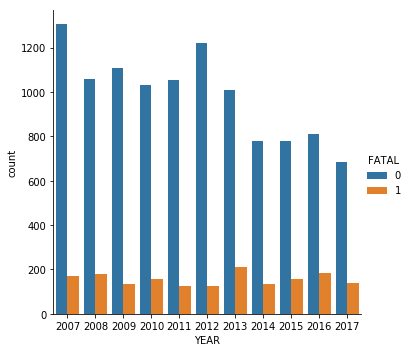

In [16]:
#Categorizing Fatal vs. non-Fatal Incident (non-unique i.e: one accident is counted depending upon involved parties)

sns.catplot(x='YEAR', kind='count', data=KSI_CLEAN,  hue='FATAL')

## From 2007 to 2017, the numbers of non-fatal accident declined while those occurance of fatal accident kept unchanged.

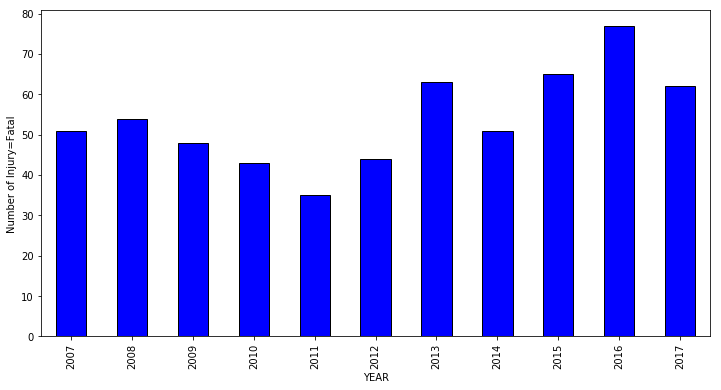

In [17]:
#Lets look at Fatality over years (# of people died)
Fatality = KSI_CLEAN[KSI_CLEAN['INJURY'] =='Fatal']
Fatality = Fatality.groupby(KSI_CLEAN['YEAR']).count()
plt.figure(figsize=(12,6))


plt.ylabel('Number of Injury=Fatal')
Fatality['INJURY'].plot(kind='bar',color="blue" , edgecolor='black')

plt.show()


## Fatal injury was highest in 2016

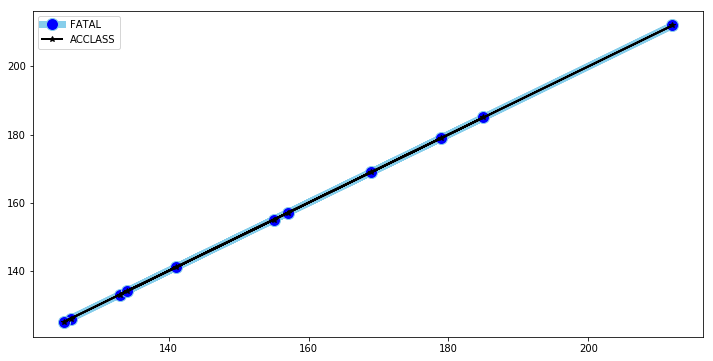

In [18]:

#Lets look at Fatality over years (# of people died)
plt.figure(figsize=(12,6))
Fatal = KSI_CLEAN[KSI_CLEAN['FATAL'] ==1]
Fatal = Fatal.groupby(KSI_CLEAN['YEAR']).count()
ACCFatal=KSI_CLEAN[KSI_CLEAN['ACCLASS'] =='Fatal']
ACCFatal = ACCFatal.groupby(KSI_CLEAN['YEAR']).count()

# multiple line plot
# multiple line plot
plt.plot( 'YEAR', 'FATAL', data=Fatal, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=7)
plt.plot( 'YEAR', 'ACCLASS', data=ACCFatal, marker='*', color='black', linewidth=2)

plt.legend()
#ACCCLASS=FATAL

## ACCCLASS=FATAL

# District vs Region 

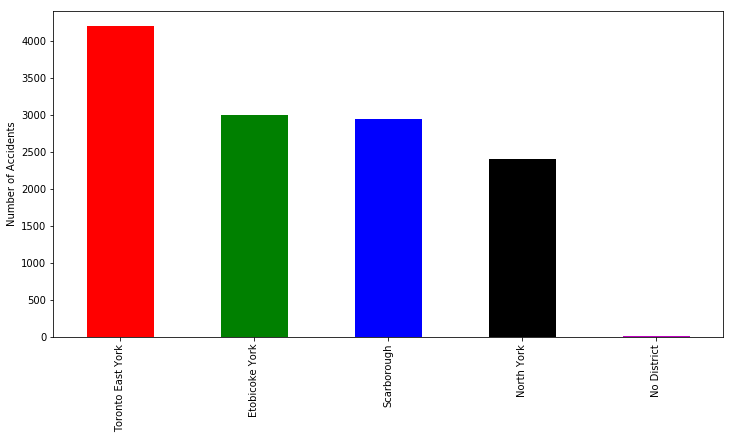

In [19]:
#Looking at area where accident happens

Region_KSI_CLEAN = KSI_CLEAN['District'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Number of Accidents')
Region_KSI_CLEAN.plot(kind='bar',color=list('rgbkmc') )
plt.show()

## District--Toronto East York has the most accident numbers.

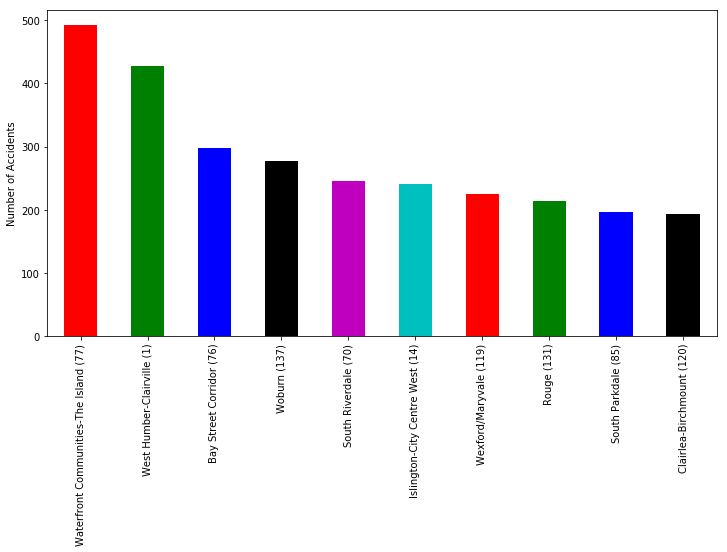

In [20]:
Hood_KSI_CLEAN = KSI_CLEAN['Hood_Name'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Number of Accidents')
Hood_KSI_CLEAN.nlargest(10).plot(kind='bar',color=list('rgbkmc') )
plt.show()

## Neighbourhood-- Waterfront Communities has most accidents

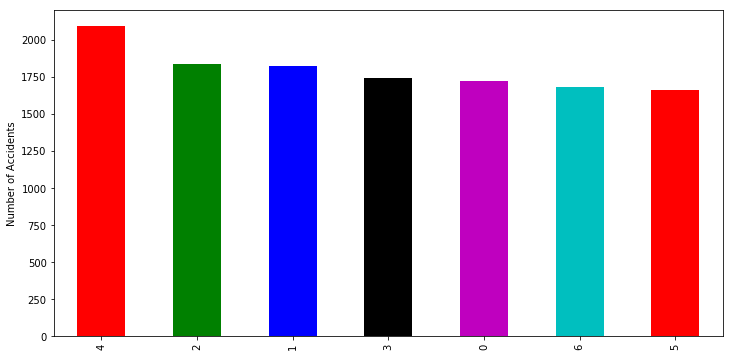

In [21]:
Weekday_KSI_CLEAN = KSI_CLEAN['WEEKDAY'].value_counts()
plt.figure(figsize=(12,6))
plt.ylabel('Number of Accidents')
Weekday_KSI_CLEAN.plot(kind='bar',color=list('rgbkmc') )
plt.show()

# The distribution on basis of day of the week shows that Friday had highest accidents

#### 2.5 Pivot table and pie chart for Summarison

Automobiles have been pretty consistent reason of accident over the years involving aggressive driving and pedestrians 

##### The columns in ksi_pivot can be classified into following categories:
    - Driving condition for accidents (AG_DRIV, ALCOHOL, DISABILITY, REDLIGHT, SPEEDING)
    - Type of vehicles involved (AUTOMOBILE, CYCLIST, EMERG_VEH, MOTORCYCLE, TRNS_CITY_VEH, TRUCK)

From KSI_pivot_cause, AG_DRIV (Aggressive and Distracted Driving) are the major cause of accidents (62.9%), speeding accounts for 21.4, redlight is 10.4% and alcohol is 5.3 %.

From KSI_pivot_Types, automobile is reponsible for 45.6 % accident while truck, motocycle,Transit or City Vehicle are all second to it.

From KSI_pivot_CPP, passengers and PEDESTRIAN are major victims (each 40~ %) and cyclist (12 %) are second to them.

From KSI_pivot_DF, Accidents caused 80~ % fatality.


Text(0.5, 0, 'Driving condition VS Accidents in Ontario in last 10 years(%age)')

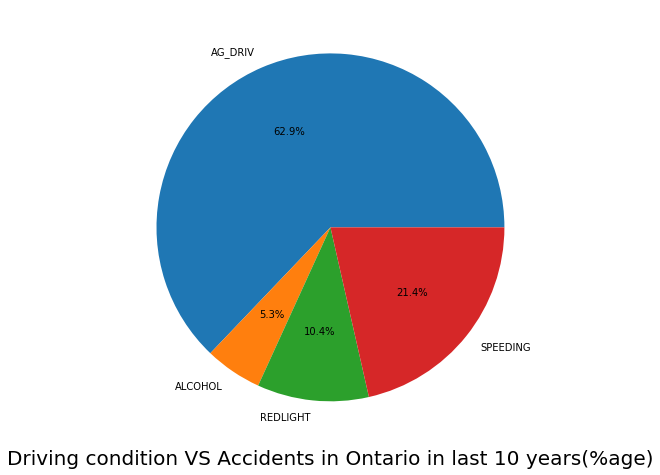

In [22]:
## Driving condition VS accident #
## creating a pivot table for accidents causing by 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'  for EDA.
KSI_pivot_cause = KSI_CLEAN.pivot_table(index='YEAR', 
                           values = ['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(8,8))
KSI_pivot_cause.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Driving condition VS Accidents in Ontario in last 10 years(%age)',fontsize=20)

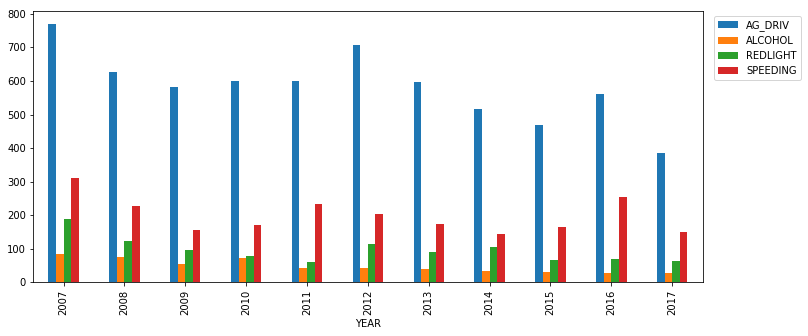

In [23]:
## creating a pivot table for accidents causing by 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL'  in 10 years
KSI_pivot_cause.drop('Total Under Category', axis=0, inplace=True)
fig, ax1 = plt.subplots(figsize=(12,5))
KSI_pivot_cause.plot(kind='bar', ax=ax1, xticks=KSI_pivot_cause.index)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

Text(0, 0.5, 'Accidents')

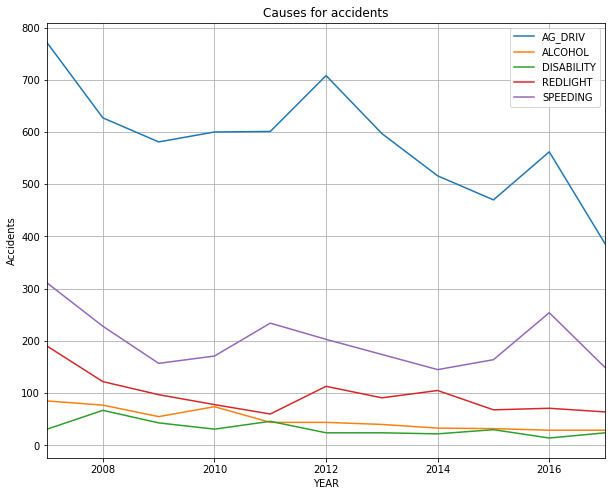

In [24]:
#Causes for Fatal in line graph
Cause_Fatal = KSI_CLEAN.pivot_table(index='YEAR', margins=False ,values=['ALCOHOL', 'AG_DRIV', 'SPEEDING','REDLIGHT','DISABILITY'],aggfunc=np.sum)
Cause_Fatal.plot(figsize=(10,8), title="Causes for accidents", grid=True)
plt.ylabel('Accidents')

Text(0.5, 0, 'Vechile type VS Accidents in Ontario in last 10 years(%age)')

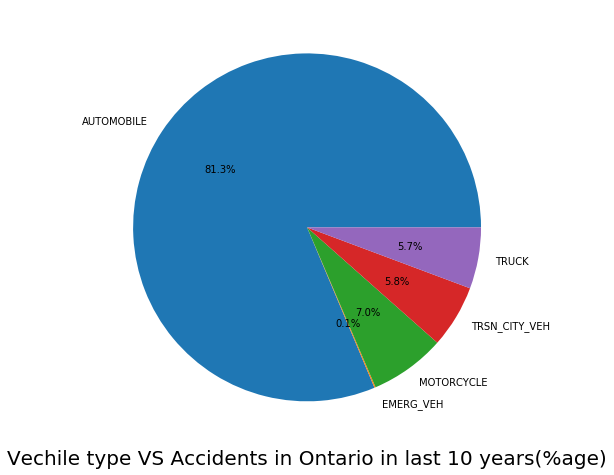

In [25]:
## vechile type VS accident #
## creating a pivot table for accidents causing by 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH'   in 10 years
KSI_pivot_Types = KSI_CLEAN.pivot_table(index='YEAR', 
                           values = [ 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH' ],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')

fig, ax1 = plt.subplots(figsize=(8,8))
KSI_pivot_Types.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Vechile type VS Accidents in Ontario in last 10 years(%age)',fontsize=20)

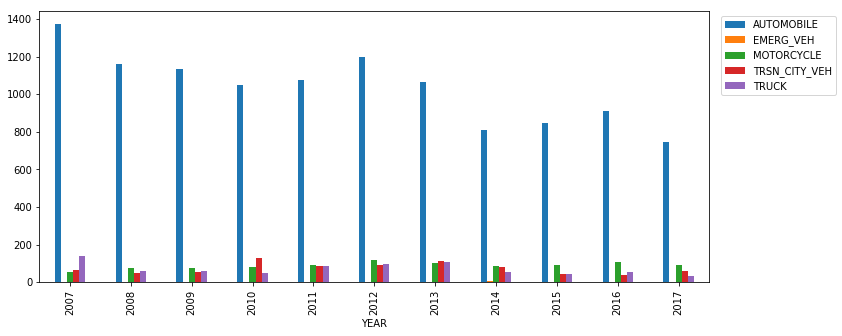

In [26]:
KSI_pivot_Types.drop('Total Under Category', axis=0, inplace=True)
fig, ax1 = plt.subplots(figsize=(12,5))
KSI_pivot_Types.plot(kind='bar', ax=ax1, xticks=KSI_pivot_cause.index)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

Text(0, 0.5, 'Vehicles')

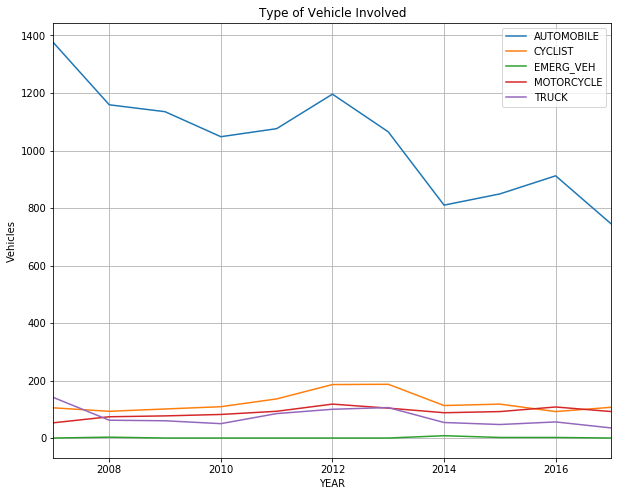

In [27]:
#Type of vehicles involved
Veh_involved = KSI_CLEAN.pivot_table(index='YEAR',values=['AUTOMOBILE', 'CYCLIST', 'EMERG_VEH', 'MOTORCYCLE', 'TRUCK'],aggfunc=np.sum)
Veh_involved.plot(figsize=(10,8), title="Type of Vehicle Involved", grid=True)
plt.ylabel('Vehicles')

Text(0.5, 0, 'Victims VS Accidents in Ontario in last 10 years(%age)')

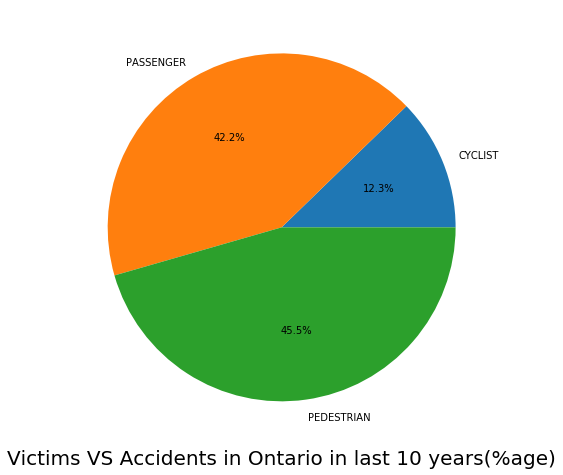

In [28]:
## Victims VS accident #
## creating a pivot table for Victims by 'CYCLIST','PEDESTRIAN','PASSENGER' 
KSI_pivot_CPP = KSI_CLEAN.pivot_table(index='YEAR', 
                           values = [ 'CYCLIST','PEDESTRIAN','PASSENGER' ],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(8,8))
KSI_pivot_CPP.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Victims VS Accidents in Ontario in last 10 years(%age)',fontsize=20)

Text(0.5, 0, 'Total Accidents in Ontario in last 10 years(%age)')

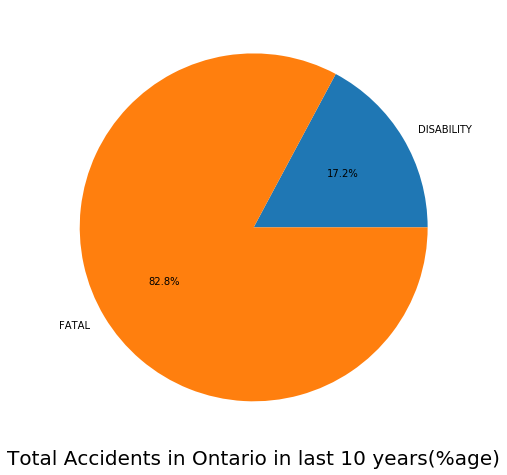

In [29]:
## Fatal and Disability VS accident #
## creating a pivot table for 'FATAL','DISABILITY' against accidents #
KSI_pivot_DF = KSI_CLEAN.pivot_table(index='YEAR', 
                           values = [ 'FATAL','DISABILITY' ],
                           aggfunc=np.sum,
                           margins = True,
                           margins_name = 'Total Under Category')
fig, ax1 = plt.subplots(figsize=(8,8))
KSI_pivot_DF.iloc[11].plot(kind='pie', ax=ax1, autopct='%3.1f%%',fontsize=10)
ax1.set_ylabel('')
ax1.set_xlabel('Total Accidents in Ontario in last 10 years(%age)',fontsize=20)

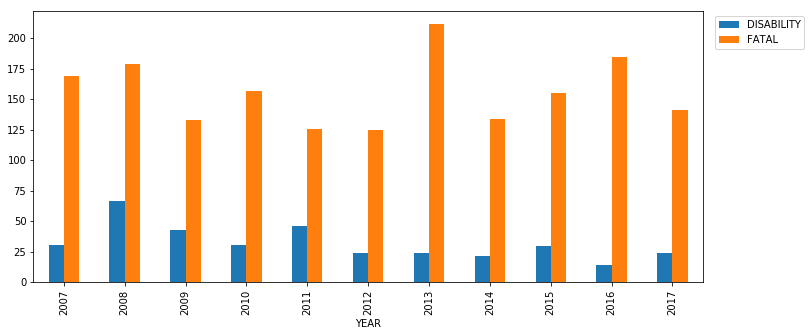

In [30]:
## creating a pivot table for 'FATAL','DISABILITY' against accidents # in 10 years
KSI_pivot_DF.drop('Total Under Category', axis=0, inplace=True)
fig, ax1 = plt.subplots(figsize=(12,5))
KSI_pivot_DF.plot(kind='bar', ax=ax1, xticks=KSI_pivot_cause.index)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

In [31]:
data = KSI_CLEAN.groupby(by=['YEAR', 'MONTH'],as_index=False).sum()
data = data.pivot('MONTH','YEAR','FATAL')
data

YEAR,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
MONTH,,,,,,,,,,,
1,3,15,4,28,11,14,10,6,5,22,12
2,14,16,5,16,3,3,6,8,8,12,6
3,19,6,13,11,6,2,15,1,16,12,14
4,13,7,10,4,2,12,18,2,9,16,12
5,2,30,8,10,0,12,9,12,16,17,12
6,25,16,11,9,8,4,4,3,16,16,8
7,23,28,8,28,16,15,35,14,9,21,14
8,16,10,6,3,37,11,39,24,14,15,11
9,23,13,11,17,12,13,21,10,27,14,18


# August 2013 had maximum fatal accidents

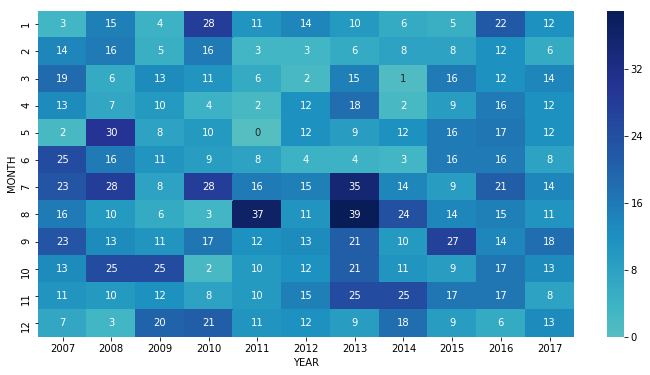

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(data, center=data.loc[1, 2007], annot=True, fmt="d", cmap="YlGnBu")
plt.show()

## Data Modeling

## Data preparation for modeling by checking null value, get dummies


In [33]:
KSI_CLEAN.shape

(12557, 49)

In [34]:
KSI_CLEAN.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'District', 'STREET1', 'STREET2', 'ROAD_CLASS', 'LOCCOORD',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

In [35]:
KSI_CLEAN.dtypes

ACCNUM              int64
YEAR                int64
MONTH               int64
DAY                 int64
HOUR                int64
MINUTES             int64
WEEKDAY             int64
LATITUDE          float64
LONGITUDE         float64
Ward_Name        category
Ward_ID             int64
Hood_Name        category
Hood_ID             int64
Division         category
District         category
STREET1          category
STREET2          category
ROAD_CLASS       category
LOCCOORD         category
ACCLOC           category
TRAFFCTL         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
ACCLASS          category
IMPACTYPE        category
INVTYPE          category
INVAGE           category
INJURY           category
FATAL_NO            int64
INITDIR          category
VEHTYPE          category
MANOEUVER        category
DRIVACT          category
DRIVCOND         category
PEDESTRIAN          int64
CYCLIST             int64
AUTOMOBILE          int64
MOTORCYCLE  

In [36]:
KSI_CLEAN_data=KSI_CLEAN[['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE',  'Hood_ID',
        'District',  
         'VISIBILITY', 'LIGHT', 'RDSFCOND', 
        'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']]

In [37]:
KSI_CLEAN_data.dtypes

ACCNUM              int64
YEAR                int64
MONTH               int64
DAY                 int64
HOUR                int64
MINUTES             int64
WEEKDAY             int64
LATITUDE          float64
LONGITUDE         float64
Hood_ID             int64
District         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
PEDESTRIAN          int64
CYCLIST             int64
AUTOMOBILE          int64
MOTORCYCLE          int64
TRUCK               int64
TRSN_CITY_VEH       int64
EMERG_VEH           int64
PASSENGER           int64
SPEEDING            int64
AG_DRIV             int64
REDLIGHT            int64
ALCOHOL             int64
DISABILITY          int64
dtype: object

Here is the list of dropping columns: 'ACCLOC', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'STREET1', 'STREET2', 'ROAD_CLASS', 'LOCCOOR','TRAFFCTL',
       'ACCLOC',  'RDSFCOND', 'ACCLASS','IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND'
       'ACCLASS',

Reason:overlapping or missing value or not related
       

In [38]:
KSI_CLEAN_data['LATITUDE']=KSI_CLEAN_data['LATITUDE'].astype('int')
KSI_CLEAN_data['LONGITUDE']=KSI_CLEAN_data['LATITUDE'].astype('int')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
print("Percentage of missing values in the KSI_CLEAN_data dataset")
KSI_CLEAN_data.isna().sum()/len(KSI_CLEAN_data)*100

Percentage of missing values in the KSI_CLEAN_data dataset


ACCNUM           0.000000
YEAR             0.000000
MONTH            0.000000
DAY              0.000000
HOUR             0.000000
MINUTES          0.000000
WEEKDAY          0.000000
LATITUDE         0.000000
LONGITUDE        0.000000
Hood_ID          0.000000
District         0.007964
VISIBILITY       0.015927
LIGHT            0.015927
RDSFCOND         0.055746
PEDESTRIAN       0.000000
CYCLIST          0.000000
AUTOMOBILE       0.000000
MOTORCYCLE       0.000000
TRUCK            0.000000
TRSN_CITY_VEH    0.000000
EMERG_VEH        0.000000
PASSENGER        0.000000
SPEEDING         0.000000
AG_DRIV          0.000000
REDLIGHT         0.000000
ALCOHOL          0.000000
DISABILITY       0.000000
dtype: float64

District         category

TRAFFCTL         category
VISIBILITY       category
LIGHT            category
RDSFCOND         category
ACCLASS          category

In [40]:
KSI_CLEAN_data['District'].unique()

[Toronto East York, Scarborough, Etobicoke York, North York, NaN, No District]
Categories (5, object): [Toronto East York, Scarborough, Etobicoke York, North York, No District]

In [41]:
KSI_CLEAN_data['VISIBILITY'].unique()

[Clear, Rain, Freezing Rain, Snow, Other, Fog, Mist, Smoke, Dust, Drifting Snow, Strong wind, NaN]
Categories (8, object): [Clear, Rain, Freezing Rain, Snow, Other, Fog, Mist, Smoke, Dust, Drifting Snow, Strong wind]

In [42]:
KSI_CLEAN_data['LIGHT'].unique()

[Dark, Dark, artificial, Dusk, artificial, Daylight, Daylight, artificial, Dusk, Dawn, artificial, NaN, Dawn, Other]
Categories (9, object): [Dark, Dark, artificial, Dusk, artificial, Daylight, ..., Dusk, Dawn, artificial, Dawn, Other]

In [43]:
KSI_CLEAN_data['RDSFCOND'].unique()

[Dry, Wet, Slush, Loose Snow, NaN, Packed Snow, Other, Loose Sand or Gravel, Ice, Spilled liquid]
Categories (9, object): [Dry, Wet, Slush, Loose Snow, ..., Other, Loose Sand or Gravel, Ice, Spilled liquid]

In [44]:

KSI_CLEAN_data = pd.get_dummies(KSI_CLEAN_data, columns=['VISIBILITY','RDSFCOND','LIGHT','District'])

In [45]:
KSI_CLEAN_data.shape

(12557, 54)

In [46]:

KSI_CLEAN_target=KSI_CLEAN[[ 'FATAL']]
KSI_CLEAN_data.dtypes

ACCNUM                               int64
YEAR                                 int64
MONTH                                int64
DAY                                  int64
HOUR                                 int64
MINUTES                              int64
WEEKDAY                              int64
LATITUDE                             int64
LONGITUDE                            int64
Hood_ID                              int64
PEDESTRIAN                           int64
CYCLIST                              int64
AUTOMOBILE                           int64
MOTORCYCLE                           int64
TRUCK                                int64
TRSN_CITY_VEH                        int64
EMERG_VEH                            int64
PASSENGER                            int64
SPEEDING                             int64
AG_DRIV                              int64
REDLIGHT                             int64
ALCOHOL                              int64
DISABILITY                           int64
VISIBILITY_

## Cluster analysis

### Elbow Method to Determine Number of Clusters

To begin with Cluster analysis, Elbow method was explored to identify optimized cluster number using 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','DISABILITY' as input and aggregate those numbers as output to further investigate and identify which neibourhood has highest numbers of accident related to input condition.

Elbow method revealed the optimal cluster to be 4 clusters.



# Finding Important features

(12557, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 15 columns):
TRAFFCTL         12533 non-null category
VISIBILITY       12555 non-null category
DRIVACT          6201 non-null category
AUTOMOBILE       12557 non-null int64
MOTORCYCLE       12557 non-null int64
TRUCK            12557 non-null int64
TRSN_CITY_VEH    12557 non-null int64
EMERG_VEH        12557 non-null int64
SPEEDING         12557 non-null int64
AG_DRIV          12557 non-null int64
REDLIGHT         12557 non-null int64
ALCOHOL          12557 non-null int64
DISABILITY       12557 non-null int64
Hood_Name        12557 non-null category
District         12556 non-null category
dtypes: category(5), int64(10)
memory usage: 1.0 MB
None


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


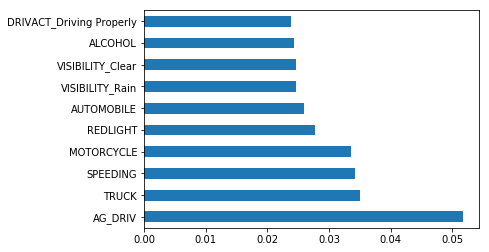

In [47]:
data = KSI_CLEAN

X = data.iloc[:,0:48]  #independent columns
cols=["ACCNUM","DAY","LATITUDE","LONGITUDE","Hood_ID","STREET1","STREET2","ROAD_CLASS","LOCCOORD","LIGHT","RDSFCOND","ACCLASS","IMPACTYPE","INVTYPE","INVAGE","INJURY","FATAL_NO","INITDIR","MANOEUVER","DRIVCOND","PEDESTRIAN","CYCLIST","PASSENGER","HOUR","MINUTES","YEAR","ACCLOC","WEEKDAY","Hood_Name","Ward_Name","Ward_ID","Division","District","MONTH","VEHTYPE"]
X=X.drop(columns=cols)
X1=X
X1["Hood_Name"]=KSI_CLEAN['Hood_Name']
X1["District"]=KSI_CLEAN['District']
print(X1.shape)
print(X.info())
X = pd.get_dummies(X)
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
 #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [48]:
drop_colmns = ['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Division',  'STREET1', 'STREET2', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',  'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'AUTOMOBILE']
df1 = KSI_CLEAN.drop(columns=drop_colmns)

In [49]:
df1_g2=df1.groupby(['Hood_Name','SPEEDING']).size().to_frame('count').reset_index()
df1speed = df1_g2.pivot(index='Hood_Name',columns='SPEEDING',values='count')
print(df1speed)
df1_g2=df1.groupby(['Hood_Name','AG_DRIV']).size().to_frame('count').reset_index()
df1agdriv = df1_g2.pivot(index='Hood_Name',columns='AG_DRIV',values='count')
df1_g2=df1.groupby(['Hood_Name','REDLIGHT']).size().to_frame('count').reset_index()
df1red = df1_g2.pivot(index='Hood_Name',columns='REDLIGHT',values='count')
df1_g2=df1.groupby(['Hood_Name','ALCOHOL']).size().to_frame('count').reset_index()
df1alco = df1_g2.pivot(index='Hood_Name',columns='ALCOHOL',values='count')
df1_g2=df1.groupby(['Hood_Name','DISABILITY']).size().to_frame('count').reset_index()
df1disb = df1_g2.pivot(index='Hood_Name',columns='DISABILITY',values='count')
df1speed = df1speed.drop(df1speed.columns[0], axis=1)
df1speed[2] = df1agdriv.drop(df1agdriv.columns[0], axis=1)
df1speed[3] = df1red.drop(df1red.columns[0], axis=1)
df1speed[4] = df1alco.drop(df1alco.columns[0], axis=1)
df1speed[5] = df1disb.drop(df1alco.columns[0], axis=1)
df1speed.columns.names = ['Cause'] 
df1 = df1speed
df1 = df1.dropna()
df1.columns = ['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','DISABILITY']


SPEEDING                                0     1
Hood_Name                                      
Agincourt North (129)               114.0  27.0
Agincourt South-Malvern West (128)   89.0  29.0
Alderwood (20)                       46.0   5.0
Annex (95)                          154.0   9.0
Banbury-Don Mills (42)               78.0  44.0
...                                   ...   ...
Wychwood (94)                        72.0   4.0
Yonge-Eglinton (100)                 47.0   1.0
Yonge-St.Clair (97)                  44.0   NaN
York University Heights (27)        156.0  24.0
Yorkdale-Glen Park (31)              74.0  10.0

[140 rows x 2 columns]


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

In [51]:
scaler = StandardScaler()
Sum_of_squared_distances = []
std_scale = scaler.fit(df1)
print(df1.shape)
df_transformed = std_scale.transform(df1)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

(43, 5)


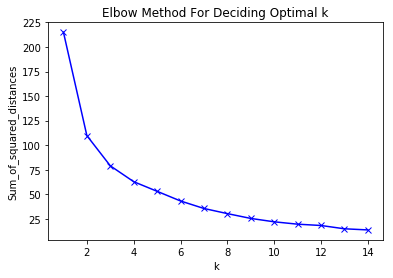

In [52]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Deciding Optimal k')
plt.show()

##### 3.2.2 Cluster analysis using Kmeans in general

In this section, Kmean was applied to all other column besides those mentioned above. But using district instead of hoodname.

In [53]:
# import KMeans
from sklearn.cluster import KMeans

In [54]:
KSI_CLEAN_data_cluster=KSI_CLEAN[['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
        'Hood_ID',
        'District',  
         'VISIBILITY', 'LIGHT', 'RDSFCOND', 
        'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY','FATAL']]

In [55]:


KSI_CLEAN_data_cluster= pd.get_dummies(KSI_CLEAN_data_cluster, columns=['VISIBILITY','RDSFCOND','LIGHT','District'])

In [56]:
KSI_CLEAN_data_cluster.shape

(12557, 53)

In [57]:
# create kmeans object
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data
kmeans.fit(X)
# print location of clusters learned by kmeans object
#cluster_center=pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)

# save new clusters for chart
#y_km = kmeans.fit_predict(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
#cluster_center.describe()

##### 3.2.3 Cluster analysis using Kmeans checking neighborhood using raw data with selected columns

Here 'SPEEDING' and 'AG_DRIV' were selected as for investigation of Neighborhood

1. It is Concluded that the Highest number of accidents causing fatalities by speeding and aggressive driving in Toronto District from 2007-2017, based on Kmeans, was occurred more in['Toronto East York']


2. when hoodname was chozen as input,  'South Parkdale (85)' 'West Humber-Clairville (1)' and 'Wexford/Maryvale (119)' rank top 3 out of all hoods as highest numbers of accidents that related to speeding and aggressive driving based on cluster that labeled as 2 and its relative pivot table for speeding and aggressive fatal numbers.

From cluster that labeled as 0 and its relative pivot table for speeding and aggressive fatal numbers,  'Elms-Old Rexdale (5)', 'Kingsway South (15)','Broadview North (57)', 'Church-Yonge Corridor (75)','Englemount-Lawrence (32)', 'Highland Creek (134)','Hillcrest Village (48)', 'Lansing-Westgate (38)','O'Connor-Parkview (54)', 'Oakwood Village (107)' are the least accidents reported among all regions.


In [59]:
drop_colmns = ['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Division', 'Hood_Name', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',  'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'AUTOMOBILE']
dk_dropped = KSI_CLEAN.drop(columns=drop_colmns)
dk = dk_dropped[dk_dropped['FATAL']==1]
dk.columns

Index(['District', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

In [60]:
dk_g21=X1.groupby(['District','SPEEDING']).size().to_frame('count').reset_index()
dkspeed1 = dk_g21.pivot(index='District',columns='SPEEDING',values='count')
print(dkspeed1)
dk_g21=X1.groupby(['District','AG_DRIV']).size().to_frame('count').reset_index()
dkagdriv1 = dk_g21.pivot(index='District',columns='AG_DRIV',values='count')

dk_g21=X1.groupby(['District','REDLIGHT']).size().to_frame('count').reset_index()
dfred1 = dk_g21.pivot(index='District',columns='REDLIGHT',values='count')

dk_g21=X1.groupby(['District','ALCOHOL']).size().to_frame('count').reset_index()
dkalco1 = dk_g21.pivot(index='District',columns='ALCOHOL',values='count')

dk_g21=X1.groupby(['District','DISABILITY']).size().to_frame('count').reset_index()
dkdisb1 = dk_g21.pivot(index='District',columns='DISABILITY',values='count')

dk_g21=X1.groupby(['District','TRUCK']).size().to_frame('count').reset_index()
dktruck1 = dk_g21.pivot(index='District',columns='TRUCK',values='count')


dk_g21=X1.groupby(['District','TRSN_CITY_VEH']).size().to_frame('count').reset_index()
dktrsn1 = dk_g21.pivot(index='District',columns='TRSN_CITY_VEH',values='count')


dk_g21=X1.groupby(['District','AUTOMOBILE']).size().to_frame('count').reset_index()
dkauto1 = dk_g21.pivot(index='District',columns='AUTOMOBILE',values='count')



dknew = dkspeed1
print(dknew)


dknew = dknew.dropna()

#dknew.columns = ['SPEEDING', 'AG_DRIV','TRUCK','AUTOMOBILE','TRSN_CITY_VEH','ALCOHOL','REDLIGHT']

dknew[0]= dkagdriv1[1]
dknew['TRUCK']=dktruck1[1]
dknew['AUTOMOBILE']=dkauto1[1]
dknew['TRSN_CITY_VEH']=dktrsn1[1]
dknew['ALCOHOL']=dkalco1[1]
dknew['REDLIGHT']=dfred1[1]
dknew
print(dknew)
dknew.columns.names = ['Cause'] 
dknew.columns = ['SPEEDING', 'AG_DRIV','TRUCK','AUTOMOBILE','TRSN_CITY_VEH','ALCOHOL','REDLIGHT']
print(dknew)

SPEEDING                0      1
District                        
Etobicoke York     2411.0  593.0
No District          13.0    NaN
North York         1946.0  453.0
Scarborough        2394.0  546.0
Toronto East York  3602.0  598.0
SPEEDING                0      1
District                        
Etobicoke York     2411.0  593.0
No District          13.0    NaN
North York         1946.0  453.0
Scarborough        2394.0  546.0
Toronto East York  3602.0  598.0
SPEEDING              0      1  TRUCK  AUTOMOBILE  TRSN_CITY_VEH  ALCOHOL  \
District                                                                    
Etobicoke York     1643  593.0  233.0      2769.0          204.0    133.0   
North York         1344  453.0  150.0      2236.0          124.0     93.0   
Scarborough        1565  546.0  157.0      2718.0          157.0    150.0   
Toronto East York  1860  598.0  256.0      3632.0          332.0    166.0   

SPEEDING           REDLIGHT  
District                     
Etobicoke York 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [61]:
'''
dk_g2=dk.groupby(['District','SPEEDING']).size().to_frame('count').reset_index()

dkspeed = dk_g2.pivot(index='District',columns='SPEEDING',values='count')

dk_g2=dk.groupby(['District','AG_DRIV']).size().to_frame('count').reset_index()
dkagdriv = dk_g2.pivot(index='District',columns='AG_DRIV',values='count')

dk_g2=dk.groupby(['District','REDLIGHT']).size().to_frame('count').reset_index()
dfred = dk_g2.pivot(index='District',columns='REDLIGHT',values='count')
dk_g2=dk.groupby(['District','ALCOHOL']).size().to_frame('count').reset_index()
dkalco = dk_g2.pivot(index='District',columns='ALCOHOL',values='count')
dk_g2=dk.groupby(['District','DISABILITY']).size().to_frame('count').reset_index()
dkdisb = dk_g2.pivot(index='District',columns='DISABILITY',values='count')
dknew = dkspeed
dknew.columns.names = ['Cause'] 

dknew = dknew.dropna()

dknew.columns = ['SPEEDING', 'AG_DRIV']
dknew['AG_DRIV']= dkagdriv[1]
print(dknew)

'''

"\ndk_g2=dk.groupby(['District','SPEEDING']).size().to_frame('count').reset_index()\n\ndkspeed = dk_g2.pivot(index='District',columns='SPEEDING',values='count')\n\ndk_g2=dk.groupby(['District','AG_DRIV']).size().to_frame('count').reset_index()\ndkagdriv = dk_g2.pivot(index='District',columns='AG_DRIV',values='count')\n\ndk_g2=dk.groupby(['District','REDLIGHT']).size().to_frame('count').reset_index()\ndfred = dk_g2.pivot(index='District',columns='REDLIGHT',values='count')\ndk_g2=dk.groupby(['District','ALCOHOL']).size().to_frame('count').reset_index()\ndkalco = dk_g2.pivot(index='District',columns='ALCOHOL',values='count')\ndk_g2=dk.groupby(['District','DISABILITY']).size().to_frame('count').reset_index()\ndkdisb = dk_g2.pivot(index='District',columns='DISABILITY',values='count')\ndknew = dkspeed\ndknew.columns.names = ['Cause'] \n\ndknew = dknew.dropna()\n\ndknew.columns = ['SPEEDING', 'AG_DRIV']\ndknew['AG_DRIV']= dkagdriv[1]\nprint(dknew)\n\n"

In [62]:
dk_g2=dk.groupby(['District','SPEEDING']).size().to_frame('count').reset_index()
dk_g2

,District,SPEEDING,count
0,Etobicoke York,0,270
1,Etobicoke York,1,109
2,North York,0,271
3,North York,1,111
4,Scarborough,0,387
5,Scarborough,1,116
6,Toronto East York,0,374
7,Toronto East York,1,77


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3425, tol=0.0001, verbose=0)
   0
0  0
1  1
2  0
3  0


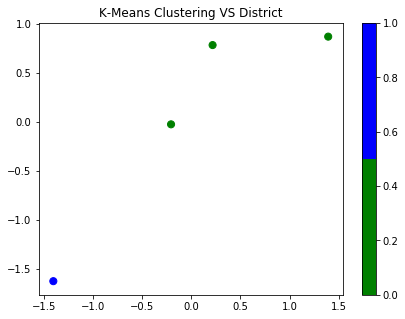

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

scaler = StandardScaler()
Sum_of_squared_distances = []
std_scale1 = scaler.fit(dknew)
dk_transformed1 = std_scale1.transform(dknew)
from sklearn.cluster import KMeans
kmeansk = KMeans(n_clusters=2,random_state=3425)
colors = ['green','blue']


plt.figure(figsize=(15, 5)) 

ax = plt.subplot(121)
kc =kmeansk.fit(dk_transformed1)
print(kc)
label = pd.DataFrame(kc.labels_)
print(label)
dk_result =pd.DataFrame(dk_transformed1)
# label = label.sort_values(by=0)
dk_result['label']=label

scatterd = plt.scatter(dk_result[0],dk_result[1],
                     c=list(label.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering VS District')

plt.colorbar(scatterd)

In [64]:
print('We Conclude that the Highest number of accidents causing fatalitiesby speeding and aggresive driving in Toronto District from 2007-2017, based on Kmeans, occured in')
neighborhoodsk = dknew.index

neighborhoodsk = np.array(neighborhoodsk)
print(neighborhoodsk[np.where(label[0]==0)])

#kdsafe = neighborhoodsk[np.where(label[0]==1)]
#kdaccident = neighborhoodsk[np.where(label[0]==0)]

We Conclude that the Highest number of accidents causing fatalitiesby speeding and aggresive driving in Toronto District from 2007-2017, based on Kmeans, occured in
['Etobicoke York' 'Scarborough' 'Toronto East York']


In [65]:
ClusterLabelk=pd.DataFrame(kmeansk.labels_) 
ClusterLabelk['label']=dknew.index
ClusterLabelk

,0,label
0,0,Etobicoke York
1,1,North York
2,0,Scarborough
3,0,Toronto East York


In [66]:
drop_colmns = ['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_ID',
       'Division',  'STREET1', 'STREET2', 'ROAD_CLASS',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',  'PEDESTRIAN',
       'CYCLIST', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'AUTOMOBILE']
df_dropped = KSI_CLEAN.drop(columns=drop_colmns)
df = df_dropped[df_dropped['FATAL']==1]
df.columns

Index(['Hood_Name', 'District', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL'],
      dtype='object')

In [67]:
dk_g21=X1.groupby(['Hood_Name','SPEEDING']).size().to_frame('count').reset_index()
dkspeed1 = dk_g21.pivot(index='Hood_Name',columns='SPEEDING',values='count')

dk_g21=X1.groupby(['Hood_Name','AG_DRIV']).size().to_frame('count').reset_index()
dkagdriv1 = dk_g21.pivot(index='Hood_Name',columns='AG_DRIV',values='count')

dk_g21=X1.groupby(['Hood_Name','REDLIGHT']).size().to_frame('count').reset_index()
dfred1 = dk_g21.pivot(index='Hood_Name',columns='REDLIGHT',values='count')

dk_g21=X1.groupby(['Hood_Name','ALCOHOL']).size().to_frame('count').reset_index()
dkalco1 = dk_g21.pivot(index='Hood_Name',columns='ALCOHOL',values='count')

dk_g21=X1.groupby(['Hood_Name','DISABILITY']).size().to_frame('count').reset_index()
dkdisb1 = dk_g21.pivot(index='Hood_Name',columns='DISABILITY',values='count')

dk_g21=X1.groupby(['Hood_Name','TRUCK']).size().to_frame('count').reset_index()
dktruck1 = dk_g21.pivot(index='Hood_Name',columns='TRUCK',values='count')


dk_g21=X1.groupby(['Hood_Name','TRSN_CITY_VEH']).size().to_frame('count').reset_index()
dktrsn1 = dk_g21.pivot(index='Hood_Name',columns='TRSN_CITY_VEH',values='count')


dk_g21=X1.groupby(['Hood_Name','AUTOMOBILE']).size().to_frame('count').reset_index()
dkauto1 = dk_g21.pivot(index='Hood_Name',columns='AUTOMOBILE',values='count')


dfnew = dkspeed1
print(dknew)


dknew = dknew.dropna()

#dknew.columns = ['SPEEDING', 'AG_DRIV','TRUCK','AUTOMOBILE','TRSN_CITY_VEH','ALCOHOL','REDLIGHT']

dfnew[0]= dkagdriv1[1]
dfnew['TRUCK']=dktruck1[1]
dfnew['AUTOMOBILE']=dkauto1[1]
dfnew['TRSN_CITY_VEH']=dktrsn1[1]
dfnew['ALCOHOL']=dkalco1[1]
dfnew['REDLIGHT']=dfred1[1]
print(dfnew)
dfnew.columns.names = ['Cause'] 
dfnew.columns = ['SPEEDING', 'AG_DRIV','TRUCK','AUTOMOBILE','TRSN_CITY_VEH','ALCOHOL','REDLIGHT']
print(dfnew)

                   SPEEDING  AG_DRIV  TRUCK  AUTOMOBILE  TRSN_CITY_VEH  \
District                                                                 
Etobicoke York         1643    593.0  233.0      2769.0          204.0   
North York             1344    453.0  150.0      2236.0          124.0   
Scarborough            1565    546.0  157.0      2718.0          157.0   
Toronto East York      1860    598.0  256.0      3632.0          332.0   

                   ALCOHOL  REDLIGHT  
District                              
Etobicoke York       133.0     277.0  
North York            93.0     218.0  
Scarborough          150.0     316.0  
Toronto East York    166.0     248.0  
SPEEDING                              0     1  TRUCK  AUTOMOBILE  \
Hood_Name                                                          
Agincourt North (129)                74  27.0    5.0       133.0   
Agincourt South-Malvern West (128)   51  29.0    2.0       111.0   
Alderwood (20)                       32   5.0    

In [68]:
'''

df_g2=df.groupby(['Hood_Name','SPEEDING']).size().to_frame('count').reset_index()
print(df_g2)
dfspeed = df_g2.pivot(index='Hood_Name',columns='SPEEDING',values='count')
print(dfspeed)
df_g2=df.groupby(['Hood_Name','AG_DRIV']).size().to_frame('count').reset_index()
dfagdriv = df_g2.pivot(index='Hood_Name',columns='AG_DRIV',values='count')
df_g2=df.groupby(['Hood_Name','REDLIGHT']).size().to_frame('count').reset_index()
print(dfagdriv)
dfred = df_g2.pivot(index='Hood_Name',columns='REDLIGHT',values='count')
df_g2=df.groupby(['Hood_Name','ALCOHOL']).size().to_frame('count').reset_index()
dfalco = df_g2.pivot(index='Hood_Name',columns='ALCOHOL',values='count')
df_g2=df.groupby(['Hood_Name','DISABILITY']).size().to_frame('count').reset_index()
dfdisb = df_g2.pivot(index='Hood_Name',columns='DISABILITY',values='count')
dfnew = dfspeed

dfnew[0] = dfspeed[1]
dfnew[1] = dfagdriv[1]
dfdum= dfnew
'''
## edit
'''

dfdum[2]= dfred[1]
dfdum[3]=dfalco[1]
dfdum[4]=dfdisb[1]
#dfnew[1] = dfagdriv
print(dfdum)


'''


'\n\ndfdum[2]= dfred[1]\ndfdum[3]=dfalco[1]\ndfdum[4]=dfdisb[1]\n#dfnew[1] = dfagdriv\nprint(dfdum)\n\n\n'

In [69]:
dfnew.columns.names = ['Cause'] 
dfnew = dfnew.fillna(0)
print(dfnew.shape)

"""
dfdum.columns.names = ['Cause'] 
dfdum = dfdum.fillna(0)
print(dfdum)
dfdum.columns = ['SPEEDING', 'AG_DRIV','REDLIGHT','ALCHOHOL','DISABILITY']
dfdum.nlargest(10,'SPEEDING')

"""


#dfnew.columns = ['SPEEDING', 'AG_DRIV']
dfnew.nlargest(10,'SPEEDING')


(140, 7)


Cause,SPEEDING,AG_DRIV,TRUCK,AUTOMOBILE,TRSN_CITY_VEH,ALCOHOL,REDLIGHT
Hood_Name,,,,,,,
West Humber-Clairville (1),243,97.0,77.0,394.0,21.0,22.0,58.0
Waterfront Communities-The Island (77),220,62.0,38.0,407.0,35.0,16.0,50.0
Bay Street Corridor (76),160,34.0,20.0,257.0,33.0,3.0,46.0
Woburn (137),151,66.0,16.0,270.0,5.0,26.0,47.0
Islington-City Centre West (14),128,50.0,19.0,221.0,9.0,14.0,24.0
Rouge (131),126,61.0,3.0,195.0,6.0,5.0,17.0
Clairlea-Birchmount (120),121,38.0,7.0,166.0,10.0,10.0,30.0
Milliken (130),113,43.0,13.0,172.0,26.0,8.0,33.0
Wexford/Maryvale (119),113,27.0,17.0,214.0,8.0,2.0,22.0


In [70]:
print(dfnew.shape)

(140, 7)


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

scaler = StandardScaler()
Sum_of_squared_distances = []
std_scale2 = scaler.fit(dfnew)
df_transformed2 = std_scale2.transform(dfnew)
print(df_transformed2.shape)

(140, 7)


In [72]:
###
'''
scaler = StandardScaler()
Sum_of_squared_distances = []
std_scaledum2 = scaler.fit(dfdum)
df_transformeddum2 = std_scaledum2.transform(dfdum)
print(df_transformeddum2.shape)

'''


'\nscaler = StandardScaler()\nSum_of_squared_distances = []\nstd_scaledum2 = scaler.fit(dfdum)\ndf_transformeddum2 = std_scaledum2.transform(dfdum)\nprint(df_transformeddum2.shape)\n\n'

(140, 7)
(140, 7)
            0         1         2         3         4         5         6  \
0    0.735221  0.700177 -0.076501  0.808759  0.931402  0.222753  0.616906   
1    0.134508  0.823479 -0.411192  0.465223  0.411377 -0.764126 -0.533374   
2   -0.361734 -0.656141 -0.299628 -0.534154  0.411377  0.814880  0.521050   
3    0.421805 -0.409537  1.485391  0.996143  0.151364  0.025377 -0.533374   
4    1.414288  1.748241  0.369754  0.636991 -0.758680  2.591263 -0.341661   
..        ...       ...       ...       ...       ...       ...       ...   
135 -0.022200 -0.717791 -0.634320 -0.253079  0.541383 -0.764126 -0.533374   
136 -0.727386 -0.902744 -0.634320 -0.659076 -0.498667  0.025377 -0.725088   
137 -1.093037 -0.964395 -0.634320 -0.752767  0.931402 -0.764126 -0.725088   
138  1.623232  0.515225  1.820083  1.308448 -0.108648  0.222753  2.150614   
139  0.343451 -0.347887 -0.411192 -0.003235 -0.368661  0.025377 -0.437517   

     label  
0        3  
1        3  
2        1  
3    

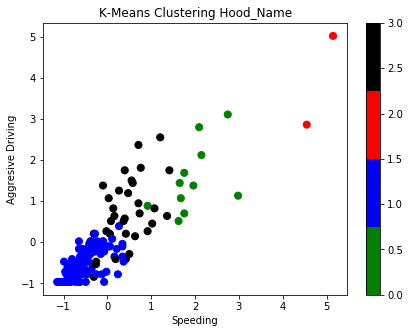

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=3425)
colors =  ['green','blue','red','black']


plt.figure(figsize=(15, 5)) 

ax = plt.subplot(121)
kc =kmeans.fit(df_transformed2)
label = pd.DataFrame(kc.labels_)
df_result2 =pd.DataFrame(df_transformed2)
print(df_transformed2.shape)
print(df_result2.shape)
# label = label.sort_values(by=0)
df_result2['label']=label

print(df_result2)
scatter = plt.scatter(df_result2[0],df_result2[1],
                     c=list(label.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Hood_Name')
plt.xlabel('Speeding')
plt.ylabel('Aggresive Driving')

plt.colorbar(scatter)


In [74]:
ClusterLabelh=pd.DataFrame(kmeans.labels_) 
ClusterLabelh['label']=dfnew.index

ClusterLabelh.head(111)

,0,label
0,3,Agincourt North (129)
1,3,Agincourt South-Malvern West (128)
2,1,Alderwood (20)
3,3,Annex (95)
4,3,Banbury-Don Mills (42)
...,...,...
106,1,Runnymede-Bloor West Village (89)
107,1,Rustic (28)
108,3,Scarborough Village (139)
109,3,South Parkdale (85)


In [75]:
print('We Conclude that the Highest number of accidents causing fatalities in Toronto Neighborhoods from 2007-2017, based on Kmeans, occured in')
neighborhoods = dfnew.index
neighborhoods = np.array(neighborhoods)
print(neighborhoods[np.where(label[0]==2)])
print(neighborhoods[np.where(label[0]==0)])
#ksafe = neighborhoods[np.where(label[0]==1)]
#kaccident = neighborhoods[np.where(label[0]==0)]

We Conclude that the Highest number of accidents causing fatalities in Toronto Neighborhoods from 2007-2017, based on Kmeans, occured in
['Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)']
['Bay Street Corridor (76)' 'Clairlea-Birchmount (120)'
 'Dorset Park (126)' 'Dovercourt-Wallace Emerson-Junction (93)'
 'Islington-City Centre West (14)' 'Milliken (130)' 'Rouge (131)'
 'South Riverdale (70)' 'Wexford/Maryvale (119)' 'Woburn (137)'
 'York University Heights (27)']


In [76]:
dfnew.nlargest(3,'SPEEDING')

Cause,SPEEDING,AG_DRIV,TRUCK,AUTOMOBILE,TRSN_CITY_VEH,ALCOHOL,REDLIGHT
Hood_Name,,,,,,,
West Humber-Clairville (1),243,97.0,77.0,394.0,21.0,22.0,58.0
Waterfront Communities-The Island (77),220,62.0,38.0,407.0,35.0,16.0,50.0
Bay Street Corridor (76),160,34.0,20.0,257.0,33.0,3.0,46.0


Looking at cluster that labeled as 2 and its relative pivot table for speeding and aggressive fatal numbers,  'Elms-Old Rexdale (5)', 'Kingsway South (15)','Broadview North (57)', 'Church-Yonge Corridor (75)','Englemount-Lawrence (32)', 'Highland Creek (134)','Hillcrest Village (48)', 'Lansing-Westgate (38)','O'Connor-Parkview (54)', 'Oakwood Village (107)' are the least accidents reported among all regions and are in cluster 0.

In [77]:
dfnew.nsmallest(10,'SPEEDING')

Cause,SPEEDING,AG_DRIV,TRUCK,AUTOMOBILE,TRSN_CITY_VEH,ALCOHOL,REDLIGHT
Hood_Name,,,,,,,
Danforth (66),2,0.0,0.0,16.0,0.0,4.0,0.0
Kingsway South (15),4,0.0,0.0,21.0,0.0,3.0,0.0
Yonge-St.Clair (97),4,0.0,0.0,33.0,13.0,0.0,0.0
Lambton Baby Point (114),6,0.0,0.0,9.0,0.0,0.0,0.0
Playter Estates-Danforth (67),8,0.0,0.0,18.0,3.0,3.0,0.0
Pleasant View (46),8,8.0,0.0,30.0,0.0,0.0,0.0
Blake-Jones (69),9,0.0,0.0,29.0,0.0,0.0,2.0
Highland Creek (134),9,4.0,0.0,25.0,0.0,0.0,4.0
Morningside (135),10,3.0,0.0,25.0,0.0,2.0,4.0


In [78]:
dfnew.nsmallest(10,'SPEEDING').index

CategoricalIndex(['Danforth (66)', 'Kingsway South (15)',
                  'Yonge-St.Clair (97)', 'Lambton Baby Point (114)',
                  'Playter Estates-Danforth (67)', 'Pleasant View (46)',
                  'Blake-Jones (69)', 'Highland Creek (134)',
                  'Morningside (135)', 'Woodbine-Lumsden (60)'],
                 categories=['Agincourt North (129)', 'Agincourt South-Malvern West (128)', 'Alderwood (20)', 'Annex (95)', 'Banbury-Don Mills (42)', 'Bathurst Manor (34)', 'Bay Street Corridor (76)', 'Bayview Village (52)', ...], ordered=False, name='Hood_Name', dtype='category')

In [79]:
'''


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    #plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    '''

"\n\n\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport sklearn.cluster as cluster\nimport time\n%matplotlib inline\nsns.set_context('poster')\nsns.set_color_codes()\nplot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}\ndef plot_clusters(data, algorithm, args, kwds):\n    start_time = time.time()\n    labels = algorithm(*args, **kwds).fit_predict(data)\n    end_time = time.time()\n    palette = sns.color_palette('deep', np.unique(labels).max() + 1)\n    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]\n    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)\n    frame = plt.gca()\n    frame.axes.get_xaxis().set_visible(False)\n    frame.axes.get_yaxis().set_visible(False)\n    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)\n    #plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)\n    "

In [80]:
'''
import time
plot_clusters(df_transformed2, cluster.KMeans, (), {'n_clusters':4})
'''

"\nimport time\nplot_clusters(df_transformed2, cluster.KMeans, (), {'n_clusters':4})\n"

##### 3.2.4 Cluster analysis using hierarchical clustering libraries

In [81]:
KSI_CLEAN.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Ward_ID', 'Hood_Name', 'Hood_ID',
       'Division', 'District', 'STREET1', 'STREET2', 'ROAD_CLASS', 'LOCCOORD',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'FATAL'],
      dtype='object')

In [82]:
KSI_CLEAN_data_clusterHieCluster=KSI_CLEAN[['FATAL','YEAR', 'MONTH', 'DAY','Hood_Name',
                                            'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','VISIBILITY', 'LIGHT', 'RDSFCOND']]

KSI_CLEAN_data_clusterHieCluster = pd.get_dummies(KSI_CLEAN_data_clusterHieCluster, columns=['VISIBILITY','RDSFCOND','LIGHT','Hood_Name'])

In [83]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [84]:
dfnew_a=dfnew
print(dfnew_a.shape)

(140, 7)


array([3, 3, 0, 3, 3, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 1, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3,
       1, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 1, 3, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0])

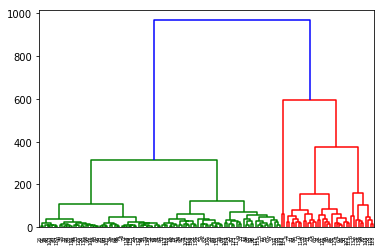

In [85]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(dfnew_a, method='ward'))
# create clusters
cluster = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
cluster.fit_predict(dfnew_a )

In [86]:
dfnew1=dfnew_a.values

In [87]:
print(cluster.labels_)

[3 3 0 3 3 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 3 1 3 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 1 0 3 3 3 0 0 3 0 0 0 0 0 0 0 3
 0 0 1 3 0 3 0 3 0 0 0 0 3 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 3 1
 0 3 0 3 0 0 0 0 0 0 3 2 0 2 0 0 0 1 3 0 0 1 0 0 0 0 0 1 0]


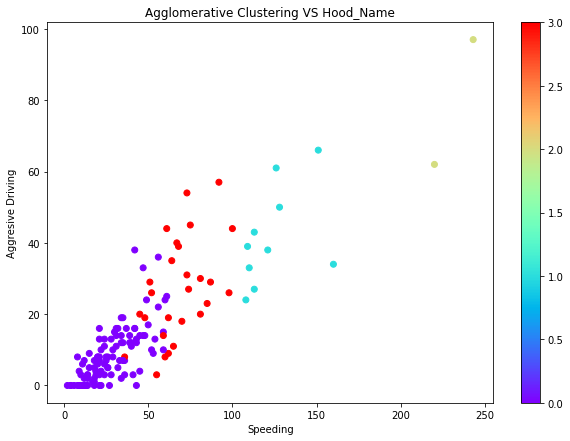

In [88]:
plt.figure(figsize=(10, 7))
scatter1=plt.scatter(dfnew1[:,0], dfnew1[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Agglomerative Clustering VS Hood_Name')
plt.xlabel('Speeding')
plt.ylabel('Aggresive Driving')

plt.colorbar(scatter1)

In [89]:

ClusterLabelh1=pd.DataFrame(cluster.labels_) 
ClusterLabelh1['labels']=dfnew_a.index

ClusterLabelh1.head(111)


,0,labels
0,3,Agincourt North (129)
1,3,Agincourt South-Malvern West (128)
2,0,Alderwood (20)
3,3,Annex (95)
4,3,Banbury-Don Mills (42)
...,...,...
106,0,Runnymede-Bloor West Village (89)
107,0,Rustic (28)
108,0,Scarborough Village (139)
109,3,South Parkdale (85)


In [90]:
label1 = pd.DataFrame(cluster.labels_)


In [91]:
print('We Conclude that the Highest number of accidents causing fatalities in Toronto Neighborhoods from 2007-2017, based on Agglomerative occured in')
neighborhoods1 = dfnew_a.index
neighborhoods1 = np.array(neighborhoods1)
print(neighborhoods1[np.where(label1[0]==2)])
print(neighborhoods1[np.where(label1[0]==1)])

We Conclude that the Highest number of accidents causing fatalities in Toronto Neighborhoods from 2007-2017, based on Agglomerative occured in
['Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)']
['Bay Street Corridor (76)' 'Clairlea-Birchmount (120)'
 'Dovercourt-Wallace Emerson-Junction (93)'
 'Islington-City Centre West (14)' 'Milliken (130)' 'Rouge (131)'
 'South Riverdale (70)' 'Wexford/Maryvale (119)' 'Woburn (137)'
 'York University Heights (27)']


#### 3.3 Feature selection

##### 3.3.1 Feature selection using P value

From P value, MONTH,DAY,Visbility, EMERG_VEH,HoodID,AUTOMOBILE,CYCLIST are over 0.05 that can be dropped for modelling. 40 columns were selected('ACCNUM', 'YEAR', 'HOUR', 'MINUTES', 'WEEKDAY', 'LATITUDE', 'LONGITUDE',
       'PEDESTRIAN', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'RDSFCOND_Dry', 'RDSFCOND_Ice', 'RDSFCOND_Loose Sand or Gravel',
       'RDSFCOND_Loose Snow', 'RDSFCOND_Other', 'RDSFCOND_Packed Snow',
       'RDSFCOND_Slush', 'RDSFCOND_Spilled liquid', 'RDSFCOND_Wet',
       'LIGHT_Dark', 'LIGHT_Dark, artificial', 'LIGHT_Dawn',
       'LIGHT_Dawn, artificial', 'LIGHT_Daylight',
       'LIGHT_Daylight, artificial', 'LIGHT_Dusk', 'LIGHT_Dusk, artificial',
       'LIGHT_Other', 'District_Etobicoke York', 'District_No District',
       'District_North York', 'District_Scarborough',
       'District_Toronto East York').

In [92]:
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(KSI_CLEAN_data)
#Fitting sm.OLS model
model = sm.OLS(KSI_CLEAN_target,X_1).fit()
"""The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). 
A low p-value (< 0.05) indicates that you can reject the null hypothesis. 
In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model 
because changes in the predictor's value are related to changes in the response variable."""
model.pvalues
model.pvalues>0.05

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


ACCNUM                               False
YEAR                                 False
MONTH                                 True
DAY                                   True
HOUR                                 False
MINUTES                               True
WEEKDAY                               True
LATITUDE                             False
LONGITUDE                            False
Hood_ID                               True
PEDESTRIAN                           False
CYCLIST                               True
AUTOMOBILE                            True
MOTORCYCLE                           False
TRUCK                                False
TRSN_CITY_VEH                        False
EMERG_VEH                             True
PASSENGER                            False
SPEEDING                             False
AG_DRIV                              False
REDLIGHT                             False
ALCOHOL                              False
DISABILITY                           False
VISIBILITY_

In [93]:
KSI_CLEAN_data.columns

Index(['ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY',
       'LATITUDE', 'LONGITUDE', 'Hood_ID', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'VISIBILITY_Clear', 'VISIBILITY_Drifting Snow',
       'VISIBILITY_Fog, Mist, Smoke, Dust', 'VISIBILITY_Freezing Rain',
       'VISIBILITY_Other', 'VISIBILITY_Rain', 'VISIBILITY_Snow',
       'VISIBILITY_Strong wind', 'RDSFCOND_Dry', 'RDSFCOND_Ice',
       'RDSFCOND_Loose Sand or Gravel', 'RDSFCOND_Loose Snow',
       'RDSFCOND_Other', 'RDSFCOND_Packed Snow', 'RDSFCOND_Slush',
       'RDSFCOND_Spilled liquid', 'RDSFCOND_Wet', 'LIGHT_Dark',
       'LIGHT_Dark, artificial', 'LIGHT_Dawn', 'LIGHT_Dawn, artificial',
       'LIGHT_Daylight', 'LIGHT_Daylight, artificial', 'LIGHT_Dusk',
       'LIGHT_Dusk, artificial', 'LIGHT_Other', 'District_Etobicoke York',
       'District_No District', 'Distric

In [94]:
##KSI_CLEAN = KSI_CLEAN.drop(["PEDTYPE", "PEDACT", "PEDCOND", "CYCLISTYPE", "CYCACT", "CYCCOND", "OFFSET"], axis=1)
X_new0= KSI_CLEAN_data.drop(["ACCNUM","LATITUDE", "MINUTES","LONGITUDE","MONTH","DAY","VISIBILITY_Clear","VISIBILITY_Drifting Snow","VISIBILITY_Fog, Mist, Smoke, Dust","VISIBILITY_Freezing Rain","VISIBILITY_Other","VISIBILITY_Rain","VISIBILITY_Snow","VISIBILITY_Strong wind", "EMERG_VEH","Hood_ID","AUTOMOBILE","CYCLIST"],axis=1)
X_new0.columns

Index(['YEAR', 'HOUR', 'WEEKDAY', 'PEDESTRIAN', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT',
       'ALCOHOL', 'DISABILITY', 'RDSFCOND_Dry', 'RDSFCOND_Ice',
       'RDSFCOND_Loose Sand or Gravel', 'RDSFCOND_Loose Snow',
       'RDSFCOND_Other', 'RDSFCOND_Packed Snow', 'RDSFCOND_Slush',
       'RDSFCOND_Spilled liquid', 'RDSFCOND_Wet', 'LIGHT_Dark',
       'LIGHT_Dark, artificial', 'LIGHT_Dawn', 'LIGHT_Dawn, artificial',
       'LIGHT_Daylight', 'LIGHT_Daylight, artificial', 'LIGHT_Dusk',
       'LIGHT_Dusk, artificial', 'LIGHT_Other', 'District_Etobicoke York',
       'District_No District', 'District_North York', 'District_Scarborough',
       'District_Toronto East York'],
      dtype='object')

In [95]:
X_new0.shape

(12557, 36)

##### 3.3.2 Feature selection using chi2 and SelectKBest

In this model, only 2 columns was selected, namely, FATAL as output and DAY as input. 

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=2).fit_transform(X_new0, KSI_CLEAN_target)
KSI_CLEAN_data.shape

(12557, 54)

In [97]:
X_new.shape

(12557, 2)

##### 3.3.3 Feature selection using ExtraTreesClassifier 5 columns  

In ExtraTreeClassifier, 12 columns such as 'YEAR', 'HOUR', 'WEEKDAY', 'PEDESTRIAN', 'PASSENGER', 'AG_DRIV'were selected for modeling

In [98]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_new0, KSI_CLEAN_target)
 
modelETC = SelectFromModel(clf, prefit=True)
X_new1 = modelETC.transform(X_new0)
X_new1.shape   


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


(12557, 6)

In [99]:
maskETC = modelETC.get_support(indices=False)    # this will return boolean mask for the columns
X_new1 = X_new0.loc[:, maskETC]                      # the sliced dataframe, keeping selected columns
featured_col_namesETC =X_new1.columns  # columns name index
featured_col_namesETC

Index(['YEAR', 'HOUR', 'WEEKDAY', 'PEDESTRIAN', 'PASSENGER', 'AG_DRIV'], dtype='object')

##### 3.3.4 Feature selection using LinearSVC X_new2

In LinearSVC model, columns including '['YEAR', 'HOUR', 'MINUTES', 'WEEKDAY', 'PEDESTRIAN', 'TRUCK',
       'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'RDSFCOND_Wet',
       'LIGHT_Dark', 'LIGHT_Daylight', 'District_Etobicoke York',
       'District_North York', 'District_Scarborough',
       'District_Toronto East York'] were selected for modeling

In [100]:
from sklearn.svm import LinearSVC

from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_new0, KSI_CLEAN_target)
modelSVC = SelectFromModel(lsvc, prefit=True)
X_new2 = modelSVC.transform(X_new0)
X_new2.shape

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(12557, 16)

In [101]:
maskSVC = modelSVC.get_support(indices=False)    # this will return boolean mask for the columns
X_new2 = X_new0.loc[:, maskSVC]                      # the sliced dataframe, keeping selected columns
featured_col_namesSVC =X_new2.columns  # columns name index
featured_col_namesSVC

Index(['YEAR', 'HOUR', 'WEEKDAY', 'PEDESTRIAN', 'TRUCK', 'TRSN_CITY_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'RDSFCOND_Wet', 'LIGHT_Dark',
       'LIGHT_Daylight', 'District_Etobicoke York', 'District_North York',
       'District_Scarborough', 'District_Toronto East York'],
      dtype='object')

#### 3.3.5 Data modeling (no pca and feature selection)  54 columns

10 columns 'ACCNUM', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY','Hood_ID', 'PASSENGER','SPEEDING' were selected as top 10 feature importance.

Performance

regr_depth2.score 0.028

logisticRegrb.score 0.864

RFRc.score 0.971



In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
regr_depth2 = DecisionTreeRegressor(max_depth=2)
regr_depth5 = DecisionTreeRegressor(max_depth=5)

In [103]:
# test_size: what proportion of original data is used for test set
Xa_train, Xa_test, y_train,y_test = train_test_split(
    X_new0, KSI_CLEAN_target,test_size=1/7.0, random_state=1)
regr_depth2.fit(Xa_train,y_train)

scorea = regr_depth2.score(Xa_train,y_train)
print(scorea)

0.027890058200681796


In [104]:
logisticRegrb = LogisticRegression(solver = 'lbfgs')
logisticRegrb.fit(Xa_train,y_train)

scoreb = logisticRegrb.score(Xa_train,y_train)
print(scoreb)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8650933754529406


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [105]:
RFRc = ske.RandomForestRegressor()
RFRc.fit(Xa_train,y_train)

scorec = RFRc.score(Xa_train,y_train)
print(scorec)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9539763428228561


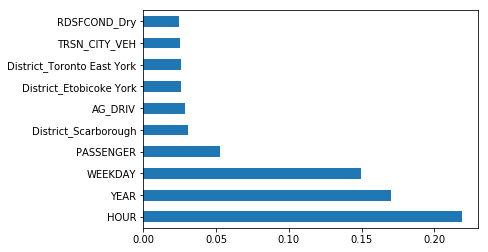

In [106]:
#'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'WEEKDAY','Hood_ID', 'PASSENGER','SPEEDING'
feat_importancesc = pd.Series(RFRc.feature_importances_, index=Xa_train.columns)
feat_importancesc.nlargest(10).plot(kind='barh')

In [107]:
Xa_train.shape

(10763, 36)

In [108]:
Xa_train.columns

Index(['YEAR', 'HOUR', 'WEEKDAY', 'PEDESTRIAN', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT',
       'ALCOHOL', 'DISABILITY', 'RDSFCOND_Dry', 'RDSFCOND_Ice',
       'RDSFCOND_Loose Sand or Gravel', 'RDSFCOND_Loose Snow',
       'RDSFCOND_Other', 'RDSFCOND_Packed Snow', 'RDSFCOND_Slush',
       'RDSFCOND_Spilled liquid', 'RDSFCOND_Wet', 'LIGHT_Dark',
       'LIGHT_Dark, artificial', 'LIGHT_Dawn', 'LIGHT_Dawn, artificial',
       'LIGHT_Daylight', 'LIGHT_Daylight, artificial', 'LIGHT_Dusk',
       'LIGHT_Dusk, artificial', 'LIGHT_Other', 'District_Etobicoke York',
       'District_No District', 'District_North York', 'District_Scarborough',
       'District_Toronto East York'],
      dtype='object')

##### 3.3.6 Raw data modeling selecting Hoodname instead of district for checking whcih hoodname has problems. 173 columns 

In [109]:
KSI_CLEAN_hoodname=KSI_CLEAN[['Hood_Name', 'YEAR', 'MONTH',
        'VISIBILITY','RDSFCOND','LIGHT',
        'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']]

KSI_CLEAN_hoodname = pd.get_dummies(KSI_CLEAN_hoodname, columns=['VISIBILITY','RDSFCOND','LIGHT','Hood_Name'])
KSI_CLEAN_target=KSI_CLEAN[['FATAL']]

Xh_train, Xh_test, y_train,y_test = train_test_split(
    KSI_CLEAN_hoodname, KSI_CLEAN_target,test_size=1/7.0, random_state=1)


RFRh = ske.RandomForestRegressor()
RFRh.fit(Xh_train,y_train)

scorehn = RFRh.score(Xh_train,y_train)
print(scorehn)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.9411579274834954


In [110]:
KSI_CLEAN_hoodname.shape

(12557, 173)

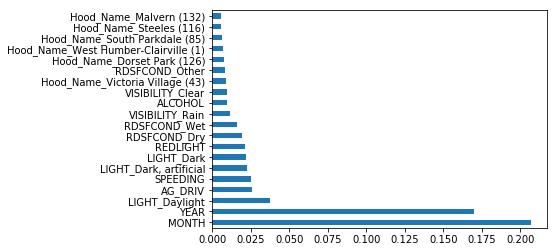

In [111]:
matplotlib.rcParams.update({'font.size': 10})
feat_importanceshn = pd.Series(RFRh.feature_importances_, index=Xh_train.columns)
feat_importanceshn.nlargest(20).plot(kind='barh')


In [112]:
KSI_CLEAN_hoodname.columns

Index(['YEAR', 'MONTH', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'VISIBILITY_Clear', 'VISIBILITY_Drifting Snow',
       'VISIBILITY_Fog, Mist, Smoke, Dust',
       ...
       'Hood_Name_Willowdale West (37)',
       'Hood_Name_Willowridge-Martingrove-Richview (7)',
       'Hood_Name_Woburn (137)', 'Hood_Name_Woodbine Corridor (64)',
       'Hood_Name_Woodbine-Lumsden (60)', 'Hood_Name_Wychwood (94)',
       'Hood_Name_Yonge-Eglinton (100)', 'Hood_Name_Yonge-St.Clair (97)',
       'Hood_Name_York University Heights (27)',
       'Hood_Name_Yorkdale-Glen Park (31)'],
      dtype='object', length=173)

Raw data modeling selecting one Hoodname instead of district for checking only hoodname southdale has problems. 32 columns 

'LIGHT_Daylight', 'AG_DRIV', 'LIGHT_Dark, artificial', 'LIGHT_Dark', 'ALCOHOL', 'RDSFCOND_Dry', 'REDLIGHT', 'RDSFCOND_Wet' are condition that need to be improved in South dale area when feature importance was used. Accidnets tend to be more on the dawn time and aggressive driving was the next contribution to fatality in South Parkdale region

In [113]:
KSI_CLEAN_hoodnameSouthdale=KSI_CLEAN[['Hood_Name','YEAR', 'MONTH','VISIBILITY','RDSFCOND','LIGHT','SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','DISABILITY']]
KSI_CLEAN_hoodnameSouthdale = pd.get_dummies(KSI_CLEAN_hoodnameSouthdale, columns=['Hood_Name'])
KSI_CLEAN_hoodnameSouthdale_columnsname = KSI_CLEAN_hoodnameSouthdale.columns.tolist()


In [114]:
KSI_CLEAN_hoodnameSouthdale=KSI_CLEAN_hoodnameSouthdale[['Hood_Name_South Parkdale (85)','YEAR', 'MONTH','VISIBILITY','RDSFCOND','LIGHT','SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL','DISABILITY']]
KSI_CLEAN_hoodnameSouthdale.columns

Index(['Hood_Name_South Parkdale (85)', 'YEAR', 'MONTH', 'VISIBILITY',
       'RDSFCOND', 'LIGHT', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY'],
      dtype='object')

In [115]:


KSI_CLEAN_hoodnameSouthdale = pd.get_dummies(KSI_CLEAN_hoodnameSouthdale, columns=['VISIBILITY','RDSFCOND','LIGHT'])
KSI_CLEAN_target=KSI_CLEAN[['FATAL']]
Xhsd_train, Xhsd_test, y_train,y_test = train_test_split(
    KSI_CLEAN_hoodnameSouthdale, KSI_CLEAN_target,test_size=1/7.0, random_state=1)


RFRhsd = ske.RandomForestRegressor()
RFRhsd.fit(Xhsd_train,y_train)

scorehnsd = RFRhsd.score(Xhsd_train,y_train)
print(scorehnsd)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.5394154414141326


In [116]:
KSI_CLEAN_hoodnameSouthdale.shape

(12557, 34)

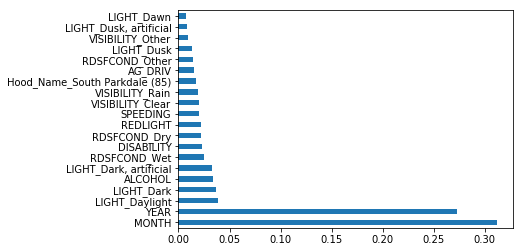

In [117]:
feat_importanceshn = pd.Series(RFRhsd.feature_importances_, index=Xhsd_train.columns)
feat_importanceshn.nlargest(20).plot(kind='barh')

In [118]:
feat_importanceshn.nlargest(10).index

Index(['MONTH', 'YEAR', 'LIGHT_Daylight', 'LIGHT_Dark', 'ALCOHOL',
       'LIGHT_Dark, artificial', 'RDSFCOND_Wet', 'DISABILITY', 'RDSFCOND_Dry',
       'REDLIGHT'],
      dtype='object')

# Applying Machine Learning Models for prediction of Fatal Accidents

In [119]:
df = pd.read_csv('../input/killed-or-seriously-injured-ksi-toronto-clean/KSI_CLEAN.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 56 columns):
ACCNUM           12557 non-null int64
YEAR             12557 non-null int64
MONTH            12557 non-null int64
DAY              12557 non-null int64
HOUR             12557 non-null int64
MINUTES          12557 non-null int64
WEEKDAY          12557 non-null int64
LATITUDE         12557 non-null float64
LONGITUDE        12557 non-null float64
Ward_Name        12557 non-null object
Ward_ID          12557 non-null int64
Hood_Name        12557 non-null object
Hood_ID          12557 non-null int64
Division         12557 non-null object
District         12557 non-null object
STREET1          12557 non-null object
STREET2          12557 non-null object
OFFSET           12557 non-null object
ROAD_CLASS       12557 non-null object
LOCCOORD         12557 non-null object
ACCLOC           12557 non-null object
TRAFFCTL         12557 non-null object
VISIBILITY       12557 non-null object
L

In [120]:
feature_lst=['WEEKDAY','Ward_Name',  'Hood_Name', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'FATAL']

In [121]:
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 37 columns):
WEEKDAY          12557 non-null int64
Ward_Name        12557 non-null object
Hood_Name        12557 non-null object
ACCLOC           12557 non-null object
TRAFFCTL         12557 non-null object
VISIBILITY       12557 non-null object
LIGHT            12557 non-null object
RDSFCOND         12557 non-null object
IMPACTYPE        12557 non-null object
INVTYPE          12557 non-null object
INVAGE           12557 non-null object
INJURY           12557 non-null object
INITDIR          12557 non-null object
VEHTYPE          12557 non-null object
MANOEUVER        12557 non-null object
DRIVACT          12557 non-null object
DRIVCOND         12557 non-null object
PEDTYPE          12557 non-null object
PEDACT           12557 non-null object
PEDCOND          12557 non-null object
CYCLISTYPE       12557 non-null object
CYCACT           12557 non-null object
CYCCOND          12557 non-null ob

In [122]:
df_sel.isnull().mean()

WEEKDAY          0.0
Ward_Name        0.0
Hood_Name        0.0
ACCLOC           0.0
TRAFFCTL         0.0
VISIBILITY       0.0
LIGHT            0.0
RDSFCOND         0.0
IMPACTYPE        0.0
INVTYPE          0.0
INVAGE           0.0
INJURY           0.0
INITDIR          0.0
VEHTYPE          0.0
MANOEUVER        0.0
DRIVACT          0.0
DRIVCOND         0.0
PEDTYPE          0.0
PEDACT           0.0
PEDCOND          0.0
CYCLISTYPE       0.0
CYCACT           0.0
CYCCOND          0.0
PEDESTRIAN       0.0
CYCLIST          0.0
AUTOMOBILE       0.0
MOTORCYCLE       0.0
TRUCK            0.0
TRSN_CITY_VEH    0.0
EMERG_VEH        0.0
PASSENGER        0.0
SPEEDING         0.0
AG_DRIV          0.0
REDLIGHT         0.0
ALCOHOL          0.0
DISABILITY       0.0
FATAL            0.0
dtype: float64

In [123]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(12557, 37)

In [124]:
target='FATAL'
# Create arrays for the features and the response variable
print(df_sel.shape)
# set X and y
y = df_sel[target]
X1 = df_sel.drop(target, axis=1)
X = pd.get_dummies(X1, drop_first=True)
print(X.shape)

(12557, 37)
(12557, 449)


In [125]:
# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [126]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest', 'Neural Network']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

In [127]:
# Logistic regression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[Logistic regression algorithm] accuracy_score: 0.912.


In [128]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [129]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.902.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.902.


In [130]:
# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))



# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.915.
[Decision Tree -- gini] accuracy_score: 0.916.


In [131]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.3f}.".format(acc))


[Random forest algorithm] accuracy_score: 0.931.


In [132]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
# Neural network
#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers
model.add(Dense(120, activation='relu', input_shape=(n_cols,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
model.fit(X_train, y_train, validation_split=0.2, epochs=100)

y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_pred.round())
print('Accuracy is:', a)

accuracy_lst.append(a)


Using TensorFlow backend.


Train on 8036 samples, validate on 2009 samples
Epoch 1/100
8036/8036 [==============================] - 1s 159us/step - loss: 0.0866 - accuracy: 0.8970 - val_loss: 0.0730 - val_accuracy: 0.9159
Epoch 2/100
8036/8036 [==============================] - 1s 106us/step - loss: 0.0631 - accuracy: 0.9216 - val_loss: 0.0667 - val_accuracy: 0.9199
Epoch 3/100
8036/8036 [==============================] - 1s 111us/step - loss: 0.0534 - accuracy: 0.9331 - val_loss: 0.0624 - val_accuracy: 0.9288
Epoch 4/100
8036/8036 [==============================] - 1s 103us/step - loss: 0.0443 - accuracy: 0.9451 - val_loss: 0.0621 - val_accuracy: 0.9248
Epoch 5/100
8036/8036 [==============================] - 1s 102us/step - loss: 0.0357 - accuracy: 0.9584 - val_loss: 0.0587 - val_accuracy: 0.9308
Epoch 6/100
8036/8036 [==============================] - 1s 107us/step - loss: 0.0273 - accuracy: 0.9716 - val_loss: 0.0570 - val_accuracy: 0.9303
Epoch 7/100
8036/8036 [==============================] - 1s 105us/step

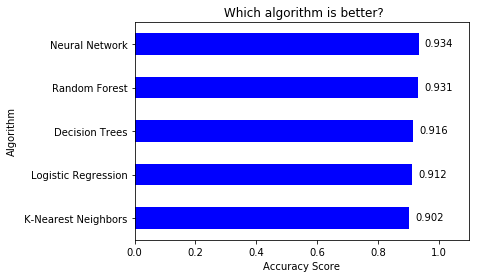

In [133]:
# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Export to a file
df_acc.to_csv('./Accuracy_scores_algorithms_{}.csv'.format('abc'),index=False)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='blue')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),3)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title(' Which algorithm is better?')

plt.show()